In [1]:
import pandas as pd
import numpy as np
import sklearn
np.random.seed(42)

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


ModuleNotFoundError: No module named 'matplotlib'

In [3]:
def writeJson(json_path, data):
    '''Overwrite or add the infomation into original json file.

    PARAM:
    `json_path`: the path of the json file
    `data`: the data you wanna add or write in the form of dictionary
    '''
    if type(data) == dict:
        key_list = list(data.keys())
        try:
            with open(json_path, "r") as jsonFile:
                origin = json.load(jsonFile)
            for i in key_list:
                origin[i] = data[i]
            with open(json_path, 'w') as jsonFile:
                jsonObj = json.dumps(origin)
                jsonFile.write(jsonObj)
        except:
            with open(json_path, 'w') as jsonFile:
                jsonObj = json.dumps(data)
                jsonFile.write(jsonObj)
    elif type(data) == list:
        with open(json_path, 'w') as jsonFile:
            jsonObj = json.dumps(data)
            jsonFile.write(jsonObj)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115b532e8>,
      dtype=object)

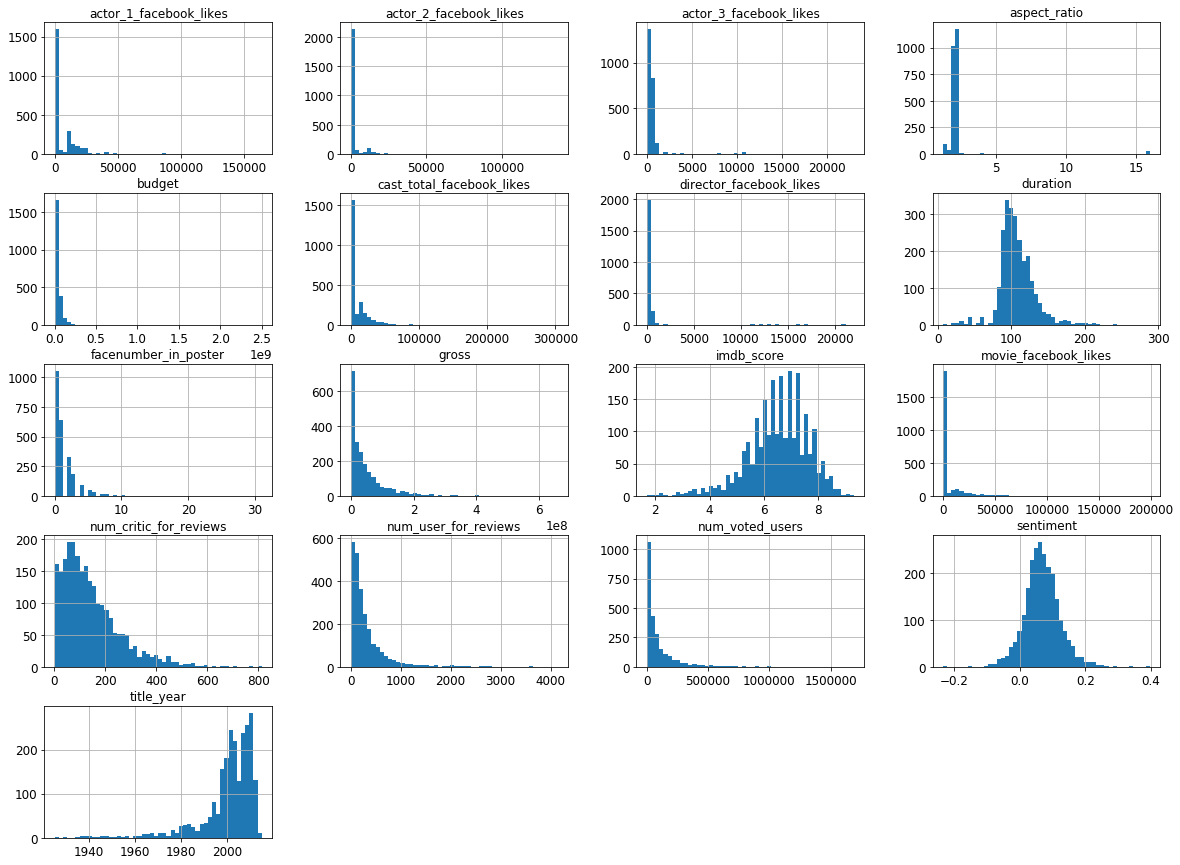

In [4]:
raw_movies = pd.read_csv("dataset/final_data.csv")
raw_movies.columns
raw_movies.hist(bins=50, figsize=(20,15))

In [32]:
raw_movies
len(raw_movies)
raw_movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sentiment
count,2420.000000,2430.000000,2358.000000,2426.000000,2433.000000,2.098000e+03,2.434000e+03,2434.000000,2433.000000,2430.000000,2.196000e+03,2357.000000,2431.000000,2434.000000,2361.00000,2434.000000,2434.000000
mean,143.952893,107.849383,804.229856,690.845837,6589.188245,4.873359e+07,9.437504e+04,10001.806902,1.290588,311.014815,4.079663e+07,2000.416207,1825.977376,6.521569,2.23784,5827.317173,0.068139
std,115.270931,24.910568,3069.021895,1760.465932,10901.868714,6.552319e+07,1.469331e+05,15444.005560,1.897405,390.841350,9.963314e+07,12.089625,4625.625446,1.095062,1.48386,15366.674228,0.053961
min,1.000000,7.000000,0.000000,0.000000,0.000000,7.030000e+02,8.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1925.000000,0.000000,1.700000,1.18000,0.000000,-0.235193
25%,60.000000,94.000000,9.000000,157.250000,662.000000,6.326182e+06,1.319800e+04,1588.000000,0.000000,87.250000,7.000000e+06,1998.000000,326.500000,5.900000,1.85000,0.000000,0.035757
50%,117.000000,104.000000,63.000000,397.500000,1000.000000,2.771321e+07,4.336700e+04,3260.500000,1.000000,189.000000,2.500000e+07,2003.000000,636.000000,6.600000,2.35000,48.000000,0.065147
75%,196.250000,119.000000,251.250000,653.000000,11000.000000,6.353902e+07,1.082465e+05,14485.250000,2.000000,377.750000,5.000000e+07,2008.000000,933.000000,7.300000,2.35000,1000.000000,0.099347
max,813.000000,289.000000,22000.000000,23000.000000,164000.000000,6.586723e+08,1.689764e+06,303717.000000,31.000000,4144.000000,2.500000e+09,2015.000000,137000.000000,9.300000,16.00000,199000.000000,0.397061


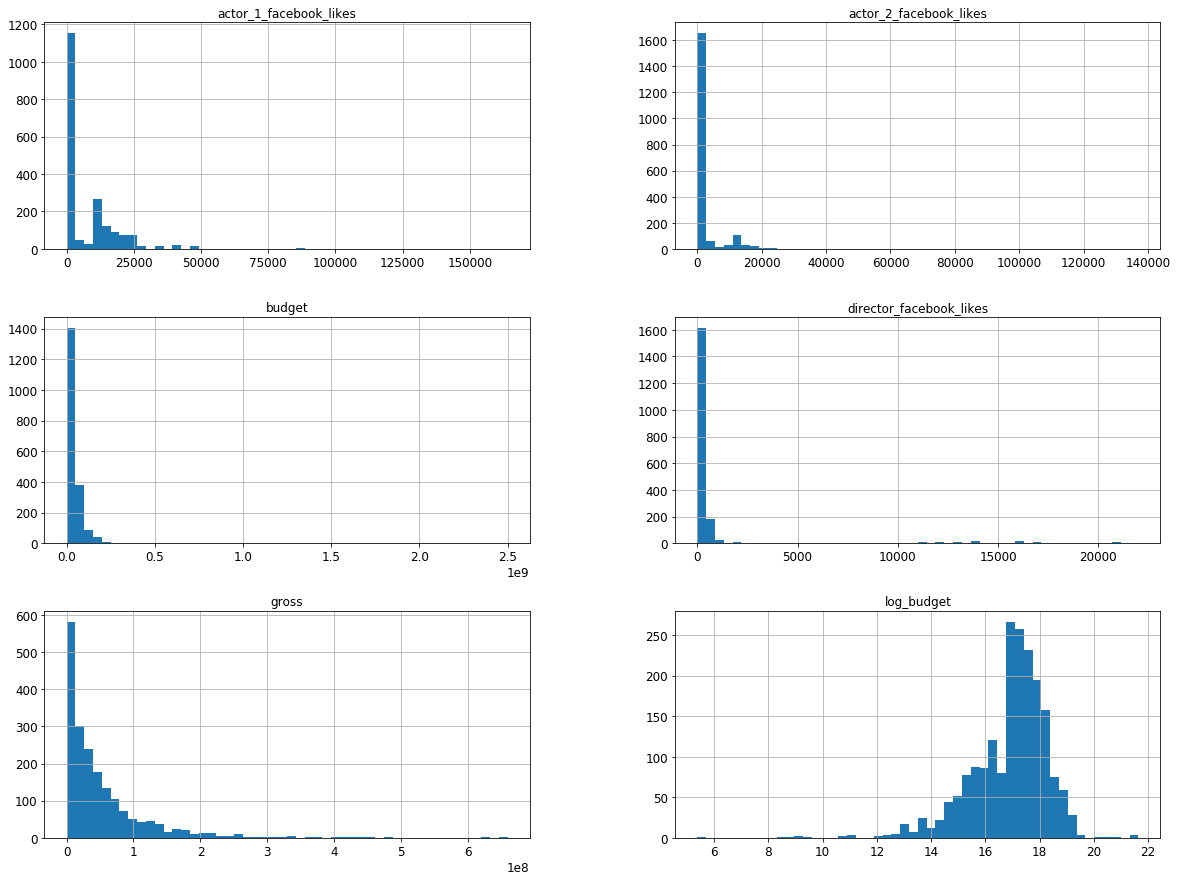

In [6]:
movies = raw_movies.dropna()
movies = movies[["gross", "budget", "director_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes",'country']]
movies.reset_index(drop=True)
# Here we change the gross into the log
# movies["gross"] = np.log(movies["gross"])
movies["log_budget"] = np.log(movies["budget"])
movies.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movies, test_size=0.2, random_state=42)

In [8]:
corr_matrix = movies.corr()

In [9]:
corr_matrix

,gross,budget,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,log_budget
gross,1.000000,0.215193,0.142370,0.209787,0.228327,0.448717
budget,0.215193,1.000000,0.063104,0.059009,0.070925,0.432058
director_facebook_likes,0.142370,0.063104,1.000000,0.148149,0.111983,0.109861
actor_1_facebook_likes,0.209787,0.059009,0.148149,1.000000,0.566304,0.196651
actor_2_facebook_likes,0.228327,0.070925,0.111983,0.566304,1.000000,0.170007
log_budget,0.448717,0.432058,0.109861,0.196651,0.170007,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119d336d8>,
      dtype=object)

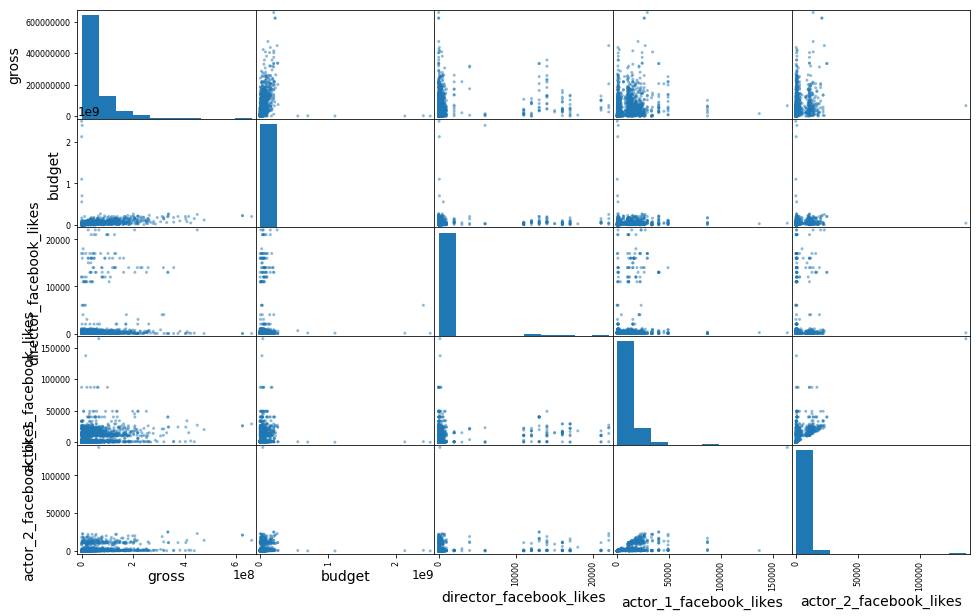

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["gross", "budget", "director_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes"]
scatter_matrix(movies[attributes], figsize=(16,10))

In [11]:
movies.describe()

,gross,budget,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,log_budget
count,1.932000e+03,1.932000e+03,1932.000000,1932.000000,1932.000000,1932.000000
mean,5.209381e+07,4.493502e+07,872.982919,7683.333333,2156.446687,16.891164
std,6.698103e+07,1.044928e+08,3213.443457,11525.975367,5101.072350,1.419063
min,7.030000e+02,2.180000e+02,0.000000,0.000000,0.000000,5.384495
25%,9.686658e+06,1.000000e+07,11.000000,743.000000,403.000000,16.118096
50%,3.168767e+07,3.000000e+07,72.500000,1000.000000,697.500000,17.216708
75%,6.718260e+07,5.500000e+07,272.000000,13000.000000,979.000000,17.822844
max,6.586723e+08,2.500000e+09,22000.000000,164000.000000,137000.000000,21.639557


In [12]:
train_set = train_set.reset_index(drop=True)
train_set["log_gross"] = np.log(train_set["gross"])
train_set.drop(["gross", "budget"], axis=1, inplace=True)
movies_tr_labels = train_set["log_gross"].copy()
movies_tr = train_set.drop("log_gross",axis=1)
movies_tr.head()

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,country,log_budget
0,521.0,13000.0,537.0,France,18.420681
1,0.0,24000.0,11000.0,USA,19.368470
2,529.0,541.0,399.0,UK,17.034386
3,37.0,574.0,573.0,France,13.592367
4,0.0,19000.0,128.0,USA,16.951005


## Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ["country"]
num_attribs = list(movies_tr.drop(cat_attribs, axis=1))

print("num\n", num_attribs)

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


movies_tr_preprocessing = full_pipeline.fit_transform(train_set) # Using the full data rather than train data
movies_tr_prepared = movies_tr_preprocessing

num
 ['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'log_budget']


In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(movies_tr_prepared, movies_tr_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.4)
elastic_net.fit(movies_tr_prepared, movies_tr_labels)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(movies_tr_prepared, movies_tr_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(movies_tr_prepared, movies_tr_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
def show_some_predictions(model):
    some_data = movies_tr.iloc[-5:]
    some_labels = movies_tr_labels.iloc[-5:]
    some_data_prepared = full_pipeline.transform(some_data)
    print("Predictions:\t", model.predict(some_data_prepared))
    print("Labels:\t\t", list(some_labels))

In [19]:
from sklearn.model_selection import cross_val_score

def display_scores(model):
    scores = cross_val_score(model, movies_tr_prepared, movies_tr_labels, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-scores)
    result_info = '''
    Scores: {scores}
    Mean: {mean}
    Standard deviation: {std}
    **********************************************
    '''.format(scores=rmse_scores, mean=rmse_scores.mean(), std=rmse_scores.std())
    print(result_info)
    return result_info

In [20]:
import json
def dump_results(**kargs):
    dit = {}
    for k,i in kargs.items():
        dit[k] = display_scores(i)
    writeJson("model_rmse_scores.json", dit)

dump_results(LinearRegression=lin_reg, ElasticNet=elastic_net, DecisionTree=tree_reg, RandomForest=forest_reg)


    Scores: [1.56037651 1.54416827 1.69931454 1.64331769 1.47064417]
    Mean: 1.5835642353132513
    Standard deviation: 0.07976122025080633
    **********************************************
    

    Scores: [1.57869361 1.58133885 1.67242366 1.71736011 1.49777334]
    Mean: 1.6095179127586985
    Standard deviation: 0.07722450187948246
    **********************************************
    

    Scores: [2.17717497 2.42232419 2.28855639 2.30525843 2.19280226]
    Mean: 2.2772232478577386
    Standard deviation: 0.08843670809404393
    **********************************************
    

    Scores: [1.69782089 1.70328486 1.68339623 1.68775465 1.63438778]
    Mean: 1.68132888217226
    Standard deviation: 0.024507481860575043
    **********************************************
    


In [21]:
import datetime
timeStart = datetime.datetime.now()
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint           
param_distribs = [{
        'n_estimators': [5*(i+1) for i in range(20)],
        'max_features': [2*(i+1) for i in range(5)],
        'min_samples_leaf': [1,2,3,4],
        'oob_score':[True]}
]
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = GridSearchCV(forest_reg, param_grid=param_distribs,
                          cv=5, scoring='neg_mean_squared_error', n_jobs=3)
rnd_search.fit(movies_tr_prepared, movies_tr_labels)
timeEnd = datetime.datetime.now()
print(str(timeEnd-timeStart)) 

0:02:19.431897


In [22]:
np.sqrt(-rnd_search.best_score_)

1.578593161182544

In [23]:
best_rnd_forest_model = rnd_search.best_estimator_ 

In [24]:
from sklearn.externals import joblib
joblib.dump(best_rnd_forest_model, "./model_instance/log_gross.pkl")

['./model_instance/log_gross.pkl']

In [25]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
feature_importances = rnd_search.best_estimator_.feature_importances_
importances_vs_features=sorted(zip(feature_importances, attributes), reverse=True, key=lambda x:x[0])

In [26]:
importances_vs_features

[(0.5133981549604322, 'log_budget'),
 (0.1473953447132626, 'actor_2_facebook_likes'),
 (0.13709050169220904, 'actor_1_facebook_likes'),
 (0.11780357896821292, 'director_facebook_likes'),
 (0.04686582621980841, 'USA'),
 (0.010934170267128224, 'UK'),
 (0.00730755908496603, 'France'),
 (0.006599066971671968, 'China'),
 (0.0037318260492862033, 'Spain'),
 (0.0028112872885446526, 'Canada'),
 (0.002651740263819042, 'Germany'),
 (0.0012743864565668871, 'Japan'),
 (0.0009851617363028748, 'Norway'),
 (0.0005861886187827035, 'Australia'),
 (0.0003537594331633982, 'Hong Kong'),
 (0.000101876157289934, 'Iran'),
 (8.351790111262318e-05, 'Argentina'),
 (2.605321744055787e-05, 'New Zealand'),
 (0.0, 'Afghanistan'),
 (0.0, 'Aruba'),
 (0.0, 'Brazil'),
 (0.0, 'Colombia'),
 (0.0, 'Czech Republic'),
 (0.0, 'Denmark'),
 (0.0, 'Finland'),
 (0.0, 'Iceland'),
 (0.0, 'India'),
 (0.0, 'Ireland'),
 (0.0, 'Italy'),
 (0.0, 'Mexico'),
 (0.0, 'Netherlands'),
 (0.0, 'New Line'),
 (0.0, 'Official site'),
 (0.0, 'Peru')

In [27]:
test_set.head()

,gross,budget,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,country,log_budget
1156,10324441.0,25000000.0,37.0,10000.0,826.0,USA,17.034386
1875,241437427.0,5000000.0,38.0,567.0,312.0,USA,15.424948
2283,143492840.0,7500000.0,655.0,24000.0,3000.0,USA,15.830414
1000,10965209.0,30000000.0,29.0,779.0,240.0,USA,17.216708
347,182204440.0,65000000.0,14000.0,23000.0,826.0,USA,17.989898


In [ ]:
test_set = test_set.reset_index(drop=True)
test_set["log_gross"] = np.log(test_set["gross"])
test_set["log_budget"] = np.log(test_set["budget"])
test_set.drop(["gross", "budget"], axis=1, inplace=True)
movies_te_labels = test_set["log_gross"].copy()
movies_te = test_set.drop("log_gross",axis=1)
movies_te.head()

In [ ]:
movies_te_prepared = full_pipeline.transform(movies_te) # Using the full data rather than train data
movies_te_predictions = best_rnd_forest_model.predict(movies_te_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(np.power(np.e,movies_te_labels), np.power(np.e, movies_te_predictions))

In [ ]:
# np.power(np.e, movies_te_labels) - test_set["gross"]

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# X = movies[['country']]
# enc.fit(X)

In [ ]:
# enc.categories_

In [ ]:
# movies["genres"] = movies["genres"].map(lambda x: x.split('|'))

In [ ]:
# movies.stack()

In [ ]:
# Z = movies['genres']
# enc2 = OneHotEncoder(handle_unknown='ignore')
# Z

In [ ]:
# split_genre("ada|dad")